# **Project Name**    -  **VaxTrack: Global Vaccination Analytics**



##### **Name**            -  **Alwin Shaji**
##### **Project Type**    - **EDA**
##### **Contribution**    - **Individual**



# **Project Summary**

In this project, I will focus on analyzing global vaccination data to understand patterns, correlations and regional disparities in immunization and disease incidence. The work will begin by mounting and exploring five distinct datasets: Coverage Data, Incidence Rate Data, Reported Cases Data, Vaccine Introduction Data and Vaccine Schedule Data. Each dataset will provide a unique perspective ranging from vaccination percentages to disease outbreaks, raw reported cases, timelines of vaccine adoption and detailed administration schedules. I will examine the structure of these datasets, check for missing values, and perform necessary data wrangling to ensure consistency across variables such as country names, WHO regions and years. This preprocessing will be critical in preparing the data for integration and deeper analysis.

After initial cleaning, I will create a SQLite database to store the structured datasets in a more organized format. This step will involve designing appropriate tables, inserting the cleaned datasets and ensuring relational consistency through common identifiers like country codes, years and disease or vaccine descriptions. By housing the data in a database, I will be able to run flexible queries, join datasets effectively and establish a solid foundation for further analysis. The database-first approach will also enhance the reproducibility and scalability of the project, allowing future updates or additional datasets to be incorporated seamlessly.

The exploratory analysis will take place in Python, where I will use libraries like Pandas, Seaborn, and Matplotlib to generate meaningful visualizations. These will include comparisons of vaccination coverage across WHO regions, correlations between vaccination coverage and incidence rates, and timelines showing when vaccines were introduced in different countries. For example, I will construct scatter plots with regression lines to explore whether higher coverage leads to lower disease incidence, bar charts and box plots to compare coverage between development-related groups, and heatmaps to highlight vaccine introduction patterns over decades. Insights from this phase will reveal global disparities, highlight outliers, and point to key public health challenges.

Once the Python-based analysis is complete, I will transition to Power BI to build interactive dashboards. The SQLite database will be connected to Power BI, where I will design visualizations that allow stakeholders to explore the data dynamically. These will include geographical bubble maps to display vaccination coverage by country, trend lines and bar charts to show changes over time, scatter plots to examine correlations, and KPI indicators to track progress toward health targets such as achieving 90% coverage for key vaccines. Relationships between tables will be created in Power BI to integrate multiple datasets, ensuring that insights remain consistent and comprehensive.

The overall aim of this project will be to provide a clear, data-driven picture of global vaccination trends. By combining traditional EDA in Python with interactive business intelligence tools in Power BI, the project will not only generate static insights but also create a platform where users can engage with the data themselves. The findings will highlight patterns such as the lag in vaccine introduction across regions, the negative correlation between vaccination coverage and disease incidence, and the equity gap between high-income countries and least developed nations. Ultimately, this project will demonstrate the full pipeline of modern data analysis: from preprocessing and database creation to visualization and insight generation, offering valuable perspectives for both technical and policy-oriented audiences.

# **GitHub Link**

https://github.com/alwinshaji/Vaccination-Data-Analysis-and-Visualization.git

# **Problem Statement**


Analyze global vaccination data to understand trends in vaccination coverage, disease incidence, and effectiveness. Data will be cleaned, and stored in a SQL database. Power BI will be used to connect to the SQL database and create interactive dashboards that provide insights on vaccination strategies and their impact on disease control.


#### **Define Your Business Objective?**

The objective of this project is to analyze global vaccination data to identify trends in coverage, measure vaccine effectiveness, and uncover gaps in disease prevention efforts. By cleaning and structuring the data, storing it in a relational database, and building interactive dashboards, the project aims to provide actionable insights for governments, health agencies, and organizations. These insights will support smarter resource allocation, policy decisions, and vaccination strategies to improve global health outcomes.


# ***Let's Begin !***

## ***1. Know Your Data***

### Mounting the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset Loading

In [3]:
import pandas as pd

base_path = '/content/drive/MyDrive/Vaccination project/'

coverage = pd.read_excel(base_path + 'coverage-data.xlsx')
incidence = pd.read_excel(base_path + 'incidence-rate-data.xlsx')
cases = pd.read_excel(base_path + 'reported-cases-data.xlsx')
intro = pd.read_excel(base_path + 'vaccine-introduction-data.xlsx')
schedule = pd.read_excel(base_path + 'vaccine-schedule-data.xlsx')

### Dataset First View

In [4]:
# View first 5 rows of each dataset
print("Coverage Data:")
display(coverage.head())

print("Incidence Rate Data:")
display(incidence.head())

print("Reported Cases Data:")
display(cases.head())

print("Vaccine Introduction Data:")
display(intro.head())

print("Vaccine Schedule Data:")
display(schedule.head())


Coverage Data:


,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,NaN,NaN,NaN
1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,NaN,NaN,NaN
2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,NaN,NaN,90.52
4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69


Incidence Rate Data:


,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0


Reported Cases Data:


,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,0.0
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,0.0
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,NaN
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,0.0


Vaccine Introduction Data:


,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
0,AFG,Afghanistan,EMRO,2023.0,aP (acellular pertussis) vaccine,No
1,AFG,Afghanistan,EMRO,2023.0,Hepatitis A vaccine,No
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes


Vaccine Schedule Data:


,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN
1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN
2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN
3,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,NaN
4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN


### Dataset Rows & Columns count

In [5]:
# Check number of rows and columns for each dataset
datasets = {
    'Coverage Data': coverage,
    'Incidence Rate Data': incidence,
    'Reported Cases Data': cases,
    'Vaccine Introduction Data': intro,
    'Vaccine Schedule Data': schedule
}

for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")


Coverage Data: 399859 rows, 11 columns
Incidence Rate Data: 84946 rows, 8 columns
Reported Cases Data: 84870 rows, 7 columns
Vaccine Introduction Data: 138321 rows, 6 columns
Vaccine Schedule Data: 8053 rows, 12 columns


### Dataset Information

In [6]:
# Display info for all datasets
for name, df in datasets.items():
    print(f"\n{name} Info:")
    df.info()



Coverage Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   GROUP                          399859 non-null  object 
 1   CODE                           399858 non-null  object 
 2   NAME                           398584 non-null  object 
 3   YEAR                           399858 non-null  float64
 4   ANTIGEN                        399858 non-null  object 
 5   ANTIGEN_DESCRIPTION            399858 non-null  object 
 6   COVERAGE_CATEGORY              399858 non-null  object 
 7   COVERAGE_CATEGORY_DESCRIPTION  399858 non-null  object 
 8   TARGET_NUMBER                  79030 non-null   float64
 9   DOSES                          79327 non-null   float64
 10  COVERAGE                       230477 non-null  float64
dtypes: float64(4), object(7)
memory usage: 33.6+ MB

Incidence Rate Data I

#### Duplicate Values

In [7]:
# Check duplicate values in all datasets
for name, df in datasets.items():
    dup_count = df.duplicated().sum()
    print(f"{name}: {dup_count} duplicate rows")


Coverage Data: 0 duplicate rows
Incidence Rate Data: 0 duplicate rows
Reported Cases Data: 0 duplicate rows
Vaccine Introduction Data: 0 duplicate rows
Vaccine Schedule Data: 0 duplicate rows


#### Missing Values/Null Values

In [8]:
# Check missing/null values in all datasets
for name, df in datasets.items():
    print(f"\n{name} missing values:")
    print(df.isnull().sum())



Coverage Data missing values:
GROUP                                 0
CODE                                  1
NAME                               1275
YEAR                                  1
ANTIGEN                               1
ANTIGEN_DESCRIPTION                   1
COVERAGE_CATEGORY                     1
COVERAGE_CATEGORY_DESCRIPTION         1
TARGET_NUMBER                    320829
DOSES                            320532
COVERAGE                         169382
dtype: int64

Incidence Rate Data missing values:
GROUP                      0
CODE                       1
NAME                       1
YEAR                       1
DISEASE                    1
DISEASE_DESCRIPTION        1
DENOMINATOR                1
INCIDENCE_RATE         23362
dtype: int64

Reported Cases Data missing values:
GROUP                      0
CODE                       1
NAME                       1
YEAR                       1
DISEASE                    1
DISEASE_DESCRIPTION        1
CASES                  

In [9]:
# Missing value summary with percentages
for name, df in datasets.items():
    print(f"\n{name} missing value summary:")
    missing_summary = df.isnull().mean() * 100
    print(missing_summary[missing_summary > 0].sort_values(ascending=False))



Coverage Data missing value summary:
TARGET_NUMBER                    80.235533
DOSES                            80.161257
COVERAGE                         42.360432
NAME                              0.318862
CODE                              0.000250
YEAR                              0.000250
COVERAGE_CATEGORY                 0.000250
ANTIGEN_DESCRIPTION               0.000250
ANTIGEN                           0.000250
COVERAGE_CATEGORY_DESCRIPTION     0.000250
dtype: float64

Incidence Rate Data missing value summary:
INCIDENCE_RATE         27.502178
NAME                    0.001177
CODE                    0.001177
YEAR                    0.001177
DISEASE                 0.001177
DISEASE_DESCRIPTION     0.001177
DENOMINATOR             0.001177
dtype: float64

Reported Cases Data missing value summary:
CASES                  22.858489
CODE                    0.001178
NAME                    0.001178
YEAR                    0.001178
DISEASE                 0.001178
DISEASE_DESCRIPTIO

In [10]:
# Drop columns with more than 50% missing values
for name, df in datasets.items():
    threshold = 0.5  # 50%
    cols_to_drop = df.columns[df.isnull().mean() > threshold]
    datasets[name] = df.drop(columns=cols_to_drop)
    print(f"{name}: Dropped columns -> {list(cols_to_drop)}")


Coverage Data: Dropped columns -> ['TARGET_NUMBER', 'DOSES']
Incidence Rate Data: Dropped columns -> []
Reported Cases Data: Dropped columns -> []
Vaccine Introduction Data: Dropped columns -> []
Vaccine Schedule Data: Dropped columns -> ['TARGETPOP']


## ***2. Understanding Your Variables***

#### Columns Description

### 1. Coverage Data
- **Purpose**: Tracks vaccination coverage percentages for different antigens across countries and years. Helps analyze global immunization trends.  
- **Key Columns**:
  - `GROUP`: WHO region or grouping of countries.  
  - `CODE`: ISO country code.  
  - `NAME`: Country name.  
  - `YEAR`: Year of the data record.  
  - `ANTIGEN`: Vaccine code (e.g., BCG, DTP).  
  - `ANTIGEN_DESCRIPTION`: Full vaccine name.  
  - `COVERAGE_CATEGORY`: Coverage type/category.  
  - `COVERAGE_CATEGORY_DESCRIPTION`: Full description of the category.  
  - `COVERAGE`: Percentage of population covered by the vaccine.  

---

### 2. Incidence Rate Data
- **Purpose**: Shows incidence rates of vaccine-preventable diseases per year and country, useful for assessing vaccination program effectiveness.  
- **Key Columns**:
  - `GROUP`: WHO region or grouping of countries.  
  - `CODE`: ISO country code.  
  - `NAME`: Country name.  
  - `YEAR`: Year of data.  
  - `DISEASE`: Disease code.  
  - `DISEASE_DESCRIPTION`: Full disease name.  
  - `DENOMINATOR`: Population denominator used for incidence rate calculation.  
  - `INCIDENCE_RATE`: Number of cases per population (rate).  

---

### 3. Reported Cases Data
- **Purpose**: Provides raw case counts for different diseases by year and country, complementing incidence rate data.  
- **Key Columns**:
  - `GROUP`: WHO region or grouping of countries.  
  - `CODE`: ISO country code.  
  - `NAME`: Country name.  
  - `YEAR`: Year of record.  
  - `DISEASE`: Disease code.  
  - `DISEASE_DESCRIPTION`: Full disease name.  
  - `CASES`: Number of reported cases.  

---

### 4. Vaccine Introduction Data
- **Purpose**: Indicates when vaccines were introduced in each country, helping analyze the impact of vaccine rollouts.  
- **Key Columns**:
  - `ISO_3_CODE`: ISO 3-letter country code.  
  - `COUNTRYNAME`: Country name.  
  - `WHO_REGION`: WHO region classification.  
  - `YEAR`: Year of vaccine introduction.  
  - `DESCRIPTION`: Vaccine name or description.  
  - `INTRO`: Binary or indicator showing whether the vaccine was introduced that year.  

---

### 5. Vaccine Schedule Data
- **Purpose**: Details vaccine administration schedules (age of administration, number of doses, etc.) by country and year.  
- **Key Columns**:
  - `ISO_3_CODE`: ISO 3-letter country code.  
  - `COUNTRYNAME`: Country name.  
  - `WHO_REGION`: WHO region classification.  
  - `YEAR`: Year of record.  
  - `VACCINECODE`: Vaccine code.  
  - `VACCINE_DESCRIPTION`: Full vaccine name.  
  - `SCHEDULEROUNDS`: Number of doses/rounds scheduled.  
  - `TARGETPOP_DESCRIPTION`: Description of the target population group.  
  - `GEOAREA`: Geographic area.  
  - `AGEADMINISTERED`: Age at which the vaccine is administered.  
  - `SOURCECOMMENT`: Additional notes or comments.  


#### Datasets Description

### 1. Coverage Data
- **Description**: Contains vaccination coverage data (percentage of population covered, categories, antigens, etc.) by country and year.  
- **Preprocessing done**:  
  - Dropped columns with excessive missing values: `TARGET_NUMBER`, `DOSES` (both ~80% null).  
  - Minor missing values remain in `COVERAGE` (~42%) and a few descriptive columns (<1%).  
  - No duplicates retained.  

---

### 2. Incidence Rate Data
- **Description**: Provides incidence rates of different diseases by country and year.  
- **Preprocessing done**:  
  - Kept all columns (main nulls are in `INCIDENCE_RATE` ~27%).  
  - Dropped no columns since all are <50% null.  
  - Will decide later whether to fill nulls with 0 or drop rows.  

---

### 3. Reported Cases Data
- **Description**: Number of reported disease cases by country, year, and disease type.  
- **Preprocessing done**:  
  - Kept all columns (main nulls in `CASES` ~23%).  
  - No column drops.  
  - Null handling to be decided during analysis.  

---

### 4. Vaccine Introduction Data
- **Description**: Tracks when and where different vaccines were introduced across countries and WHO regions.  
- **Preprocessing done**:  
  - Very few missing values (<1%) across all columns.  
  - No columns dropped.  
  - Clean enough for immediate use.  

---

### 5. Vaccine Schedule Data
- **Description**: Contains information on vaccine schedules, such as age of administration, rounds, and target population groups.  
- **Preprocessing done**:  
  - Dropped column `TARGETPOP` (52% null).  
  - Columns like `SOURCECOMMENT` (~36% null) and `AGEADMINISTERED` ~13% null retained for now.  
  - Will consider imputation or row removal later.  


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:

# Normalize coverage percentages
if coverage['COVERAGE'].max() <= 1:
    coverage['COVERAGE'] = coverage['COVERAGE'] * 100

# Ensure incidence rates and cases are numeric
incidence['INCIDENCE_RATE'] = pd.to_numeric(incidence['INCIDENCE_RATE'], errors='coerce')
cases['CASES'] = pd.to_numeric(cases['CASES'], errors='coerce')

# Standardize YEAR columns to integer
for df in [coverage, incidence, cases, intro, schedule]:
    df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').astype('Int64')

print("✅ Units normalized and YEAR columns standardized.")


✅ Units normalized and YEAR columns standardized.


### What all manipulations have you done and insights you found?


We normalized the data to make it consistent and ready for analysis. Coverage values were converted to percentages (0–100 scale), and both incidence rates and reported cases were ensured to be numeric. All `YEAR` columns across datasets were standardized to a numeric integer format to maintain consistency for time-based analysis. These steps ensure accurate comparisons, cleaner joins, and smoother visualization later.


## 4. ***Database Creation***

In [12]:
import sqlite3

# Create/Connect to SQLite database
conn = sqlite3.connect('vaccination_project.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS coverage_data (
    group_name TEXT,
    code TEXT,
    name TEXT,
    year INTEGER,
    antigen TEXT,
    antigen_description TEXT,
    coverage_category TEXT,
    coverage_category_description TEXT,
    coverage REAL,
    PRIMARY KEY (code, year, antigen)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS incidence_rate_data (
    group_name TEXT,
    code TEXT,
    name TEXT,
    year INTEGER,
    disease TEXT,
    disease_description TEXT,
    denominator REAL,
    incidence_rate REAL,
    PRIMARY KEY (code, year, disease)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS reported_cases_data (
    group_name TEXT,
    code TEXT,
    name TEXT,
    year INTEGER,
    disease TEXT,
    disease_description TEXT,
    cases INTEGER,
    PRIMARY KEY (code, year, disease)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS vaccine_intro_data (
    iso_3_code TEXT,
    countryname TEXT,
    who_region TEXT,
    year INTEGER,
    description TEXT,
    intro TEXT,
    PRIMARY KEY (iso_3_code, year, description)
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS vaccine_schedule_data (
    iso_3_code TEXT,
    countryname TEXT,
    who_region TEXT,
    year INTEGER,
    vaccinecode TEXT,
    vaccine_description TEXT,
    schedulerounds TEXT,
    targetpop_description TEXT,
    geoarea TEXT,
    ageadministered TEXT,
    sourcecomment TEXT,
    PRIMARY KEY (iso_3_code, year, vaccinecode, schedulerounds)
);
''')

conn.commit()
print("✅ Database and tables created successfully!")


✅ Database and tables created successfully!


In [13]:
# Check if tables exist in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in database:")
for table in tables:
    print(table[0])


Tables in database:
coverage_data
incidence_rate_data
reported_cases_data
vaccine_intro_data
vaccine_schedule_data


In [14]:
# Show schema for each table
for table in ['coverage_data', 'incidence_rate_data', 'reported_cases_data', 'vaccine_intro_data', 'vaccine_schedule_data']:
    print(f"\nSchema for {table}:")
    cursor.execute(f"PRAGMA table_info({table});")
    for row in cursor.fetchall():
        print(row)



Schema for coverage_data:
(0, 'group_name', 'TEXT', 0, None, 0)
(1, 'code', 'TEXT', 0, None, 1)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'year', 'INTEGER', 0, None, 2)
(4, 'antigen', 'TEXT', 0, None, 3)
(5, 'antigen_description', 'TEXT', 0, None, 0)
(6, 'coverage_category', 'TEXT', 0, None, 0)
(7, 'coverage_category_description', 'TEXT', 0, None, 0)
(8, 'coverage', 'REAL', 0, None, 0)

Schema for incidence_rate_data:
(0, 'group_name', 'TEXT', 0, None, 0)
(1, 'code', 'TEXT', 0, None, 1)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'year', 'INTEGER', 0, None, 2)
(4, 'disease', 'TEXT', 0, None, 3)
(5, 'disease_description', 'TEXT', 0, None, 0)
(6, 'denominator', 'REAL', 0, None, 0)
(7, 'incidence_rate', 'REAL', 0, None, 0)

Schema for reported_cases_data:
(0, 'group_name', 'TEXT', 0, None, 0)
(1, 'code', 'TEXT', 0, None, 1)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'year', 'INTEGER', 0, None, 2)
(4, 'disease', 'TEXT', 0, None, 3)
(5, 'disease_description', 'TEXT', 0, None, 0)
(6, 'cases', 'INTEGER', 0, None

#### Data Insertion into Database



In [15]:
# Insert cleaned data into database
coverage.to_sql('coverage_data', conn, if_exists='replace', index=False)
incidence.to_sql('incidence_rate_data', conn, if_exists='replace', index=False)
cases.to_sql('reported_cases_data', conn, if_exists='replace', index=False)
intro.to_sql('vaccine_intro_data', conn, if_exists='replace', index=False)
schedule.to_sql('vaccine_schedule_data', conn, if_exists='replace', index=False)

print("✅ All cleaned datasets inserted into the database.")


✅ All cleaned datasets inserted into the database.


## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## 1. Global Vaccination Coverage over Time

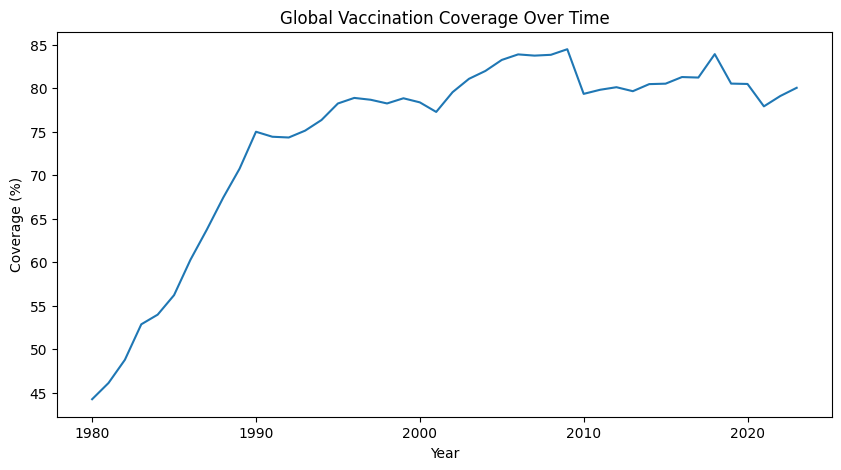

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Coverage summary
coverage_summary = coverage.groupby('YEAR')['COVERAGE'].describe()

# Global coverage trend
plt.figure(figsize=(10,5))
sns.lineplot(data=coverage, x='YEAR', y='COVERAGE', errorbar=None)
plt.title("Global Vaccination Coverage Over Time")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.show()


### Insights found from the chart





- From **1980 to 1990**, there was a **huge spike in vaccination coverage**, indicating rapid adoption of immunization programs worldwide.  
- Coverage levels continued to rise steadily after 1990, showing **consistent global improvement in access to vaccines**.  
- Around **2010, global coverage reached its highest levels**, marking a peak in vaccination success.  
- After 2010, coverage has shown **minimal fluctuations**, suggesting that most countries have stabilized their immunization programs but are struggling to push beyond a certain threshold.  
- The plateau effect post-2010 highlights that further **policy, outreach and innovation efforts** may be needed to achieve higher coverage in regions that still lag behind.  


## 2. Lowest Coverage Groups


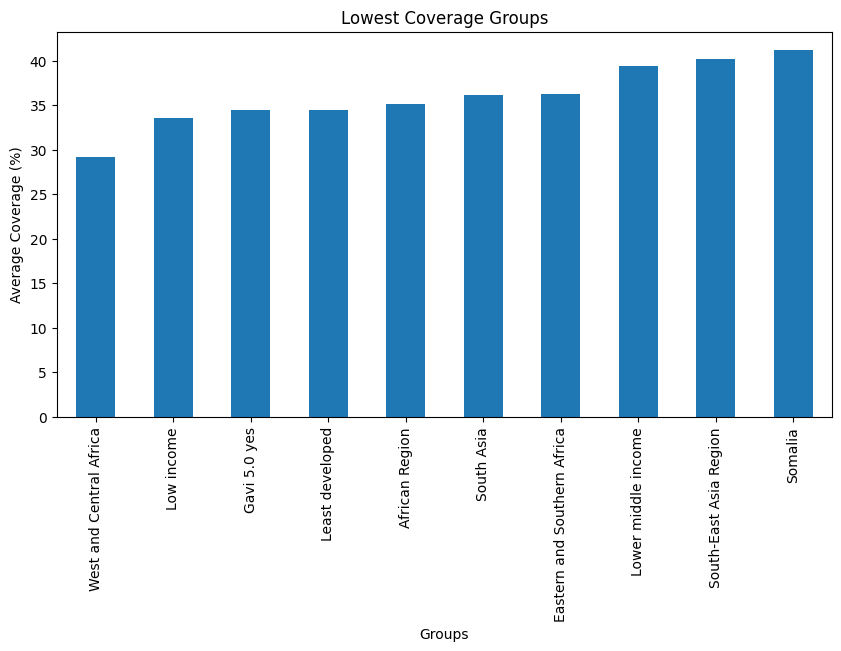

In [17]:
# bottom 10 countries by average coverage
low_coverage = coverage.groupby('NAME')['COVERAGE'].mean().nsmallest(10)
low_coverage.plot(kind='bar', figsize=(10,5), title="Lowest Coverage Groups")
plt.xlabel("Groups")
plt.ylabel("Average Coverage (%)")
plt.show()


### Insights found from the chart



- The lowest average coverage values are not always tied to specific countries but to **group categories** like *“Low income”*, *“Least developed”* and *“Gavi 5.0”*.  
- These categories highlight **systemic challenges** faced by resource-constrained nations and regions rather than isolated country-specific issues.  
- The data suggests that **economic status and development level** are strongly linked with vaccination coverage.  
- Programs like **Gavi (Global Vaccine Alliance)** specifically target these groups, which explains their appearance in the dataset as a way to track progress.  
- This emphasizes the need for **international aid, funding and policy interventions** to lift vaccination levels in the most vulnerable regions.  



## 3. Disease Incidence Trends over Time

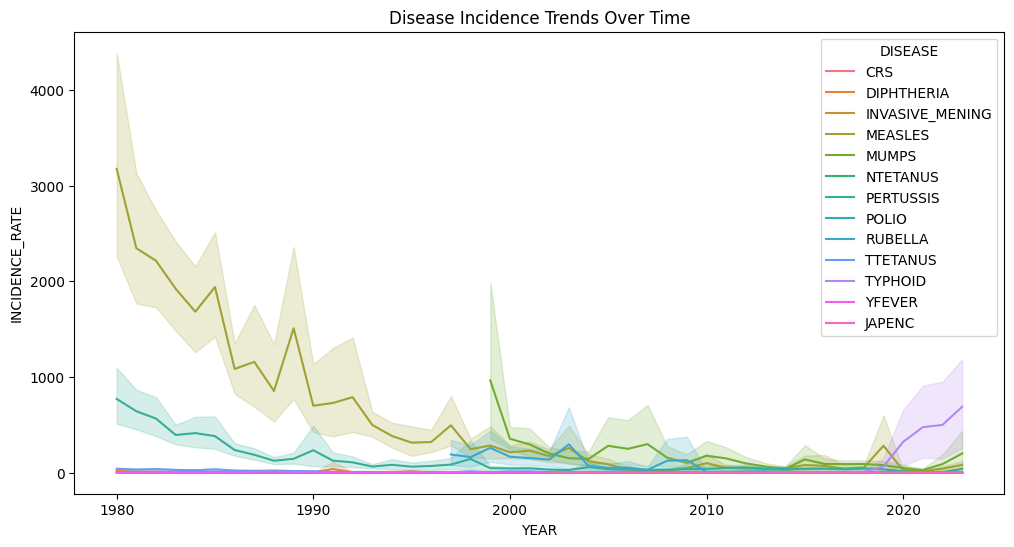

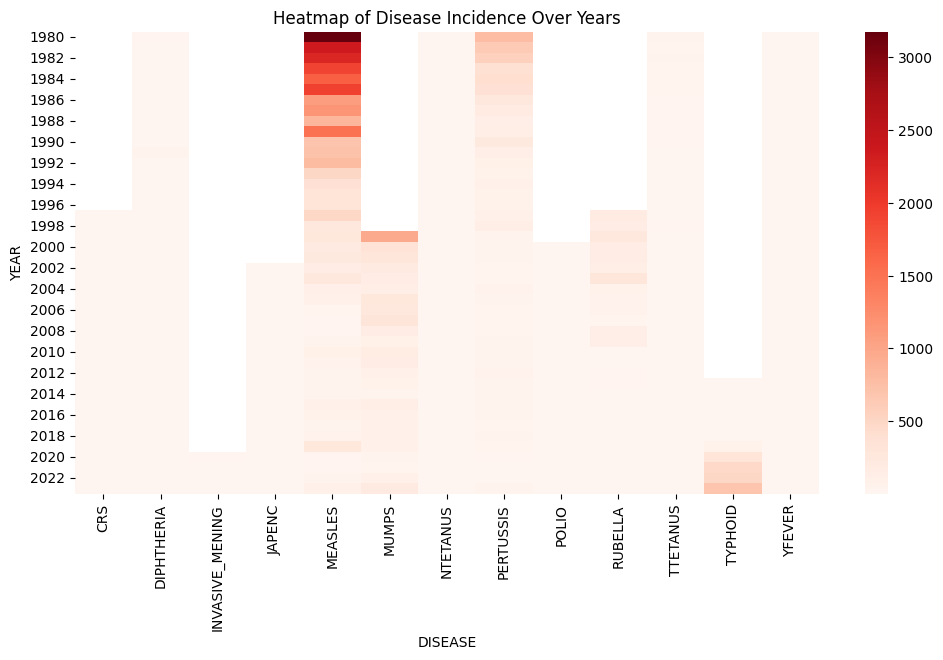

In [18]:
# Incidence trends
plt.figure(figsize=(12,6))
sns.lineplot(data=incidence, x='YEAR', y='INCIDENCE_RATE', hue='DISEASE')
plt.title("Disease Incidence Trends Over Time")
plt.show()

# Heatmap
incidence_pivot = incidence.pivot_table(index='YEAR', columns='DISEASE', values='INCIDENCE_RATE')
plt.figure(figsize=(12,6))
sns.heatmap(incidence_pivot, cmap="Reds")
plt.title("Heatmap of Disease Incidence Over Years")
plt.show()


### Insights found from the chart





- **Measles in 1980** had an exceptionally high incidence rate of over **3000**, making it the most significant outbreak in the dataset.  
- **Pertussis (whooping cough)** also showed high incidence around **1980**, with rates close to **1000**, marking it as another major early concern.  
- **Mumps around the year 2000** displayed a notable spike, standing out compared to surrounding years.  
- In more recent years, **Typhoid incidence** has been rising, indicating a modern challenge that requires attention.  
- Apart from these spikes, **most other diseases show relatively balanced or controlled incidence rates** over the years, suggesting vaccination programs have been effective overall.  




## 4. Top Countries by Reported Cases

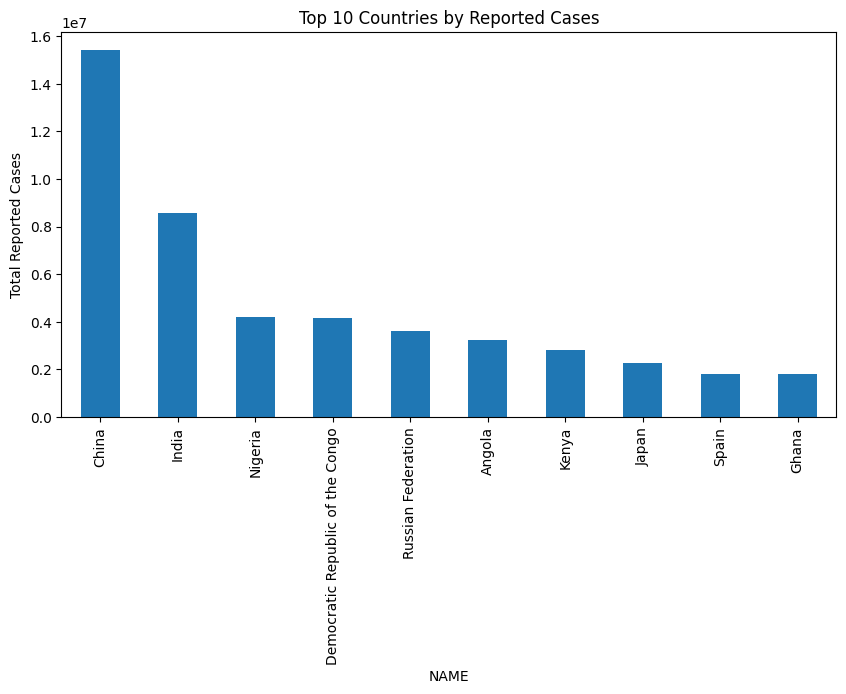

In [19]:
# Filter only countries
country_cases = cases[cases['GROUP'] == 'COUNTRIES']

# Top 10 countries by total reported cases
top_cases = country_cases.groupby('NAME')['CASES'].sum().nlargest(10)
top_cases.plot(kind='bar', figsize=(10,5), title="Top 10 Countries by Reported Cases")
plt.ylabel("Total Reported Cases")
plt.show()


### Insights found from the chart

- **China** recorded the highest number of reported cases overall, followed by **India**.  
- Out of the top 10, **five countries are from Africa**, highlighting the continued public health challenges in the region.  
- The concentration of high case counts in populous countries (China and India) reflects the strong correlation between **population size and disease burden**.  
- The African representation in the top 10 indicates that **limited healthcare access and weaker immunization infrastructure** play a significant role in sustained disease prevalence.  
- These findings underscore the importance of **targeted vaccination campaigns** and **regional health interventions** to address disproportionate burdens.  


## 5. Average Vaccination Coverage


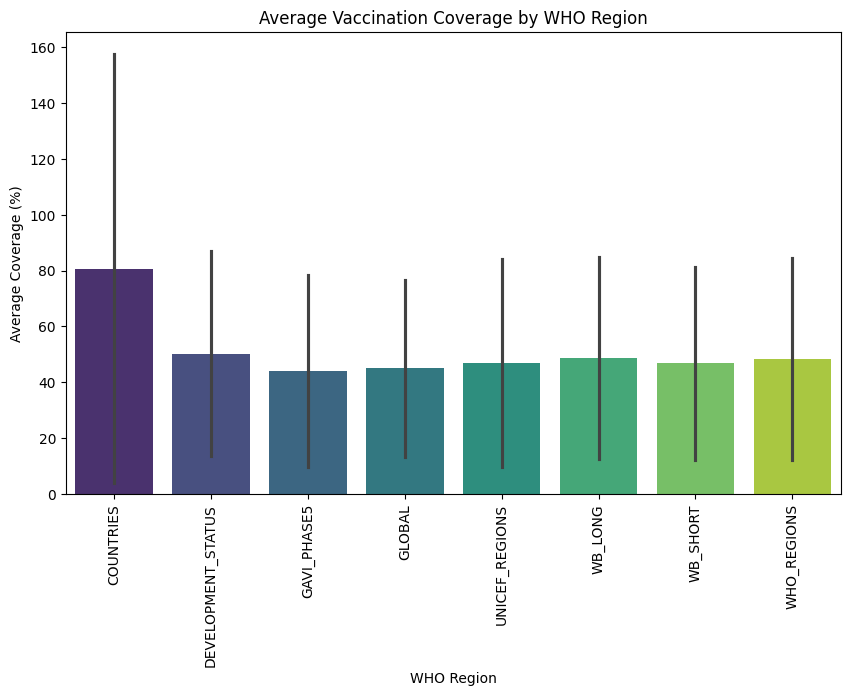

In [20]:

# Clean data
coverage_clean = coverage.dropna(subset=["COVERAGE"])

# Bar plot: average coverage by region
plt.figure(figsize=(10,6))
sns.barplot(
    data=coverage_clean,
    x="GROUP", y="COVERAGE",
    estimator="mean", errorbar="sd",
    hue="GROUP", legend=False,
    palette="viridis"
)
plt.title("Average Vaccination Coverage by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Average Coverage (%)")
plt.xticks(rotation=90)
plt.show()


### Insights found from the chart


- Countries overall average around **80% vaccination coverage**.   
- **Development-related groups (e.g., Gavi Phase 5 countries, Least Developed Countries)** tend to lag, with averages hovering around **50%**.  
- This disparity highlights the **equity gap**: while some regions approach herd immunity thresholds, others remain vulnerable to outbreaks due to insufficient coverage.  


## 6. Vaccination Coverage vs Disease Incidence

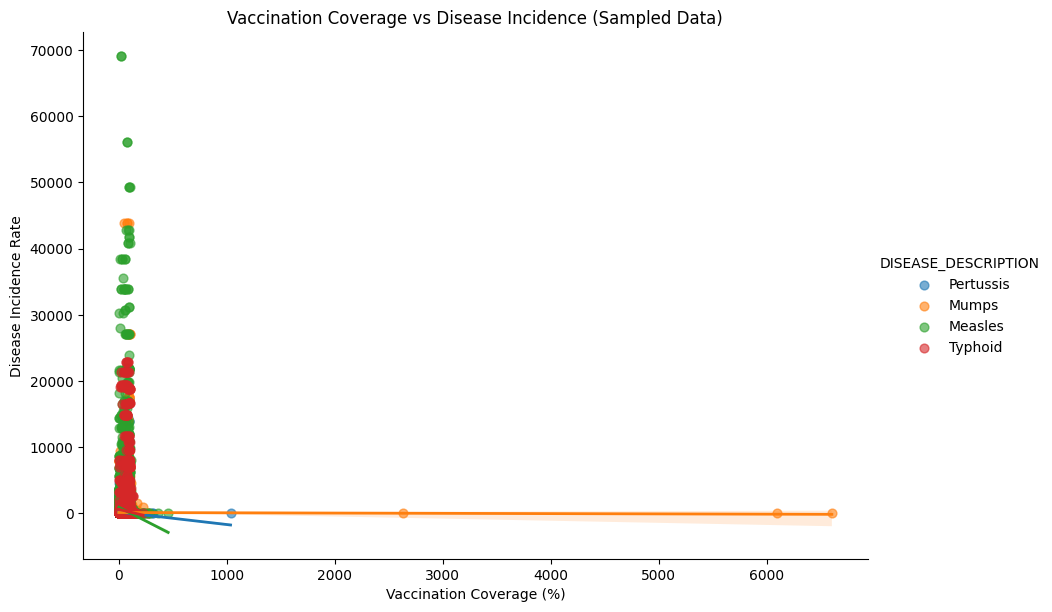

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clean datasets
coverage_clean = coverage.dropna(subset=['COVERAGE'])
incidence_clean = incidence.dropna(subset=['INCIDENCE_RATE'])

# Merge coverage and incidence on GROUP, YEAR, COUNTRY/NAME
merged = pd.merge(
    coverage_clean,
    incidence_clean,
    left_on=['GROUP', 'YEAR', 'NAME'],
    right_on=['GROUP', 'YEAR', 'NAME'],
    how='inner'
)

# Filter for top 5 common vaccine-preventable diseases
top_diseases = ['Measles', 'Polio', 'Pertussis', 'Mumps', 'Typhoid']  # adjust as per your dataset
merged_filtered = merged[merged['DISEASE_DESCRIPTION'].isin(top_diseases)]

# Sample 20% of the data to reduce runtime overload
merged_sample = merged_filtered.sample(frac=0.2, random_state=42)

# Scatter plot with regression line
sns.lmplot(
    data=merged_sample,
    x='COVERAGE',
    y='INCIDENCE_RATE',
    hue='DISEASE_DESCRIPTION',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.6, 's':40},
    line_kws={'linewidth':2}
)
plt.title("Vaccination Coverage vs Disease Incidence (Sampled Data)")
plt.xlabel("Vaccination Coverage (%)")
plt.ylabel("Disease Incidence Rate")
plt.show()

### Insights found from the chart



- Most data points are **clustered in the bottom-left corner**, indicating that **higher vaccination coverage generally corresponds to lower disease incidence** for most countries and years.  
- **Measles** shows the highest incidence among the sampled diseases, with reported cases reaching **30,000–40,000** in certain countries.  
- **Typhoid** and **other diseases** remain mostly in the lower incidence range, reflecting fewer outbreaks or better control.  
- The scatter indicates a **negative correlation** trend: as vaccination coverage increases, disease incidence tends to decrease.  
- Some outliers exist where countries have **moderate coverage but high incidence**, suggesting possible issues with **vaccine delivery, population density, or reporting inconsistencies**.  


## 7. Vaccine Intoduction Timeline

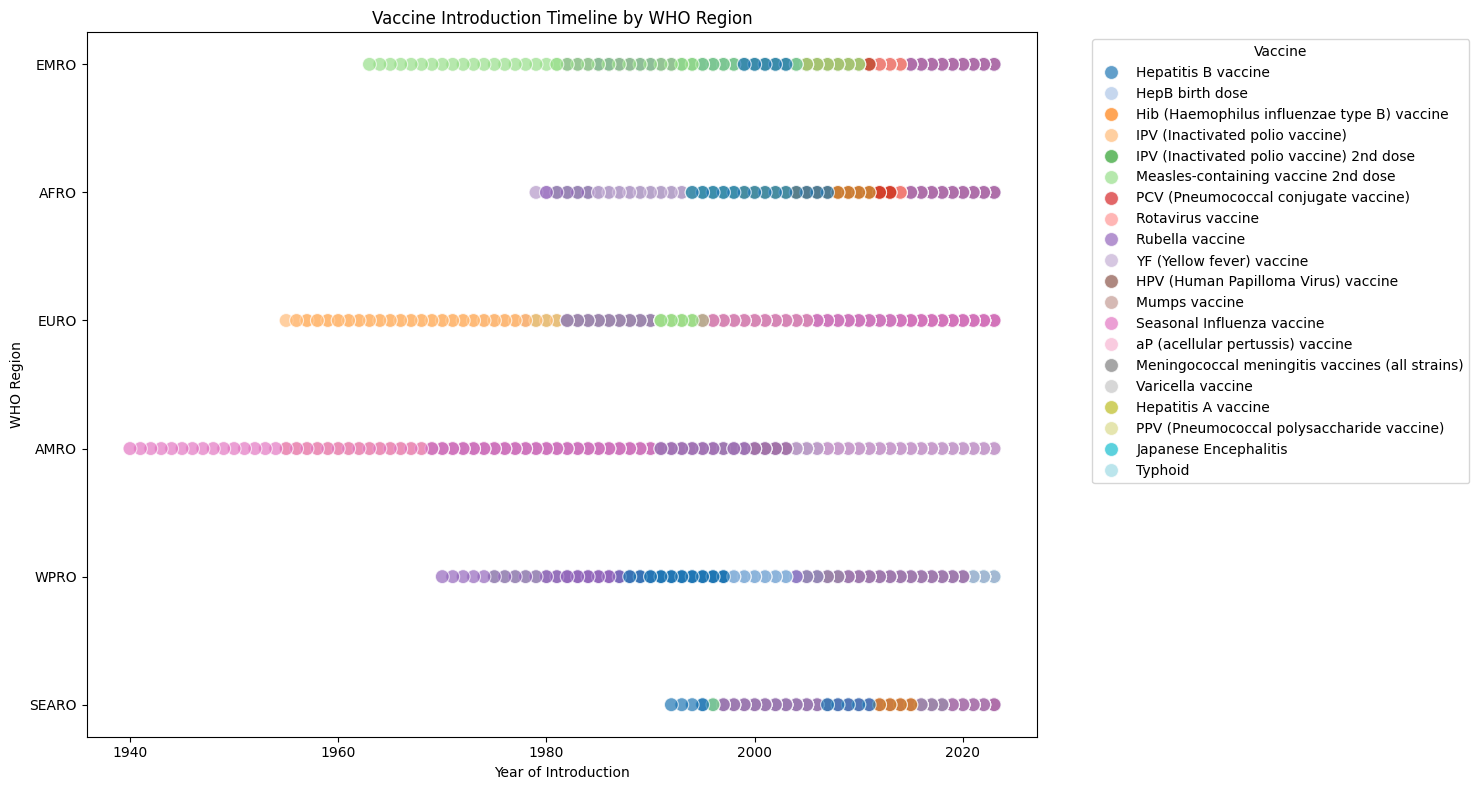

In [22]:

# Ensure YEAR is numeric
intro['YEAR'] = pd.to_numeric(intro['YEAR'], errors='coerce')

# Filter only vaccines that were introduced
intro_yes = intro[intro['INTRO'] == 'Yes'].dropna(subset=['YEAR'])

# Create a figure
plt.figure(figsize=(15,8))

# Scatter plot: x = Year, y = WHO_REGION, hue = Vaccine
sns.scatterplot(
    data=intro_yes,
    x='YEAR',
    y='WHO_REGION',
    hue='DESCRIPTION',
    palette='tab20',
    s=100,
    alpha=0.7
)

plt.title("Vaccine Introduction Timeline by WHO Region")
plt.xlabel("Year of Introduction")
plt.ylabel("WHO Region")
plt.legend(title='Vaccine', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


### Insights found from the chart

* AMRO region introduced the **seasonal influenza vaccine** earliest, around **1940**.
* AFRO region introduced the **yellow fever vaccine** around **1980**.
* EURO region rolled out the **Hib vaccine** in the **1950s**, among the earlier introductions in Europe.
* SEARO region was the latest among the regions, introducing vaccines around **1990**.
* Overall, there is a noticeable **lag in vaccine adoption** across regions, with some regions adopting decades later than others.


## 8. Vaccine Schedule by Age Administered

/tmp/ipython-input-3111359110.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


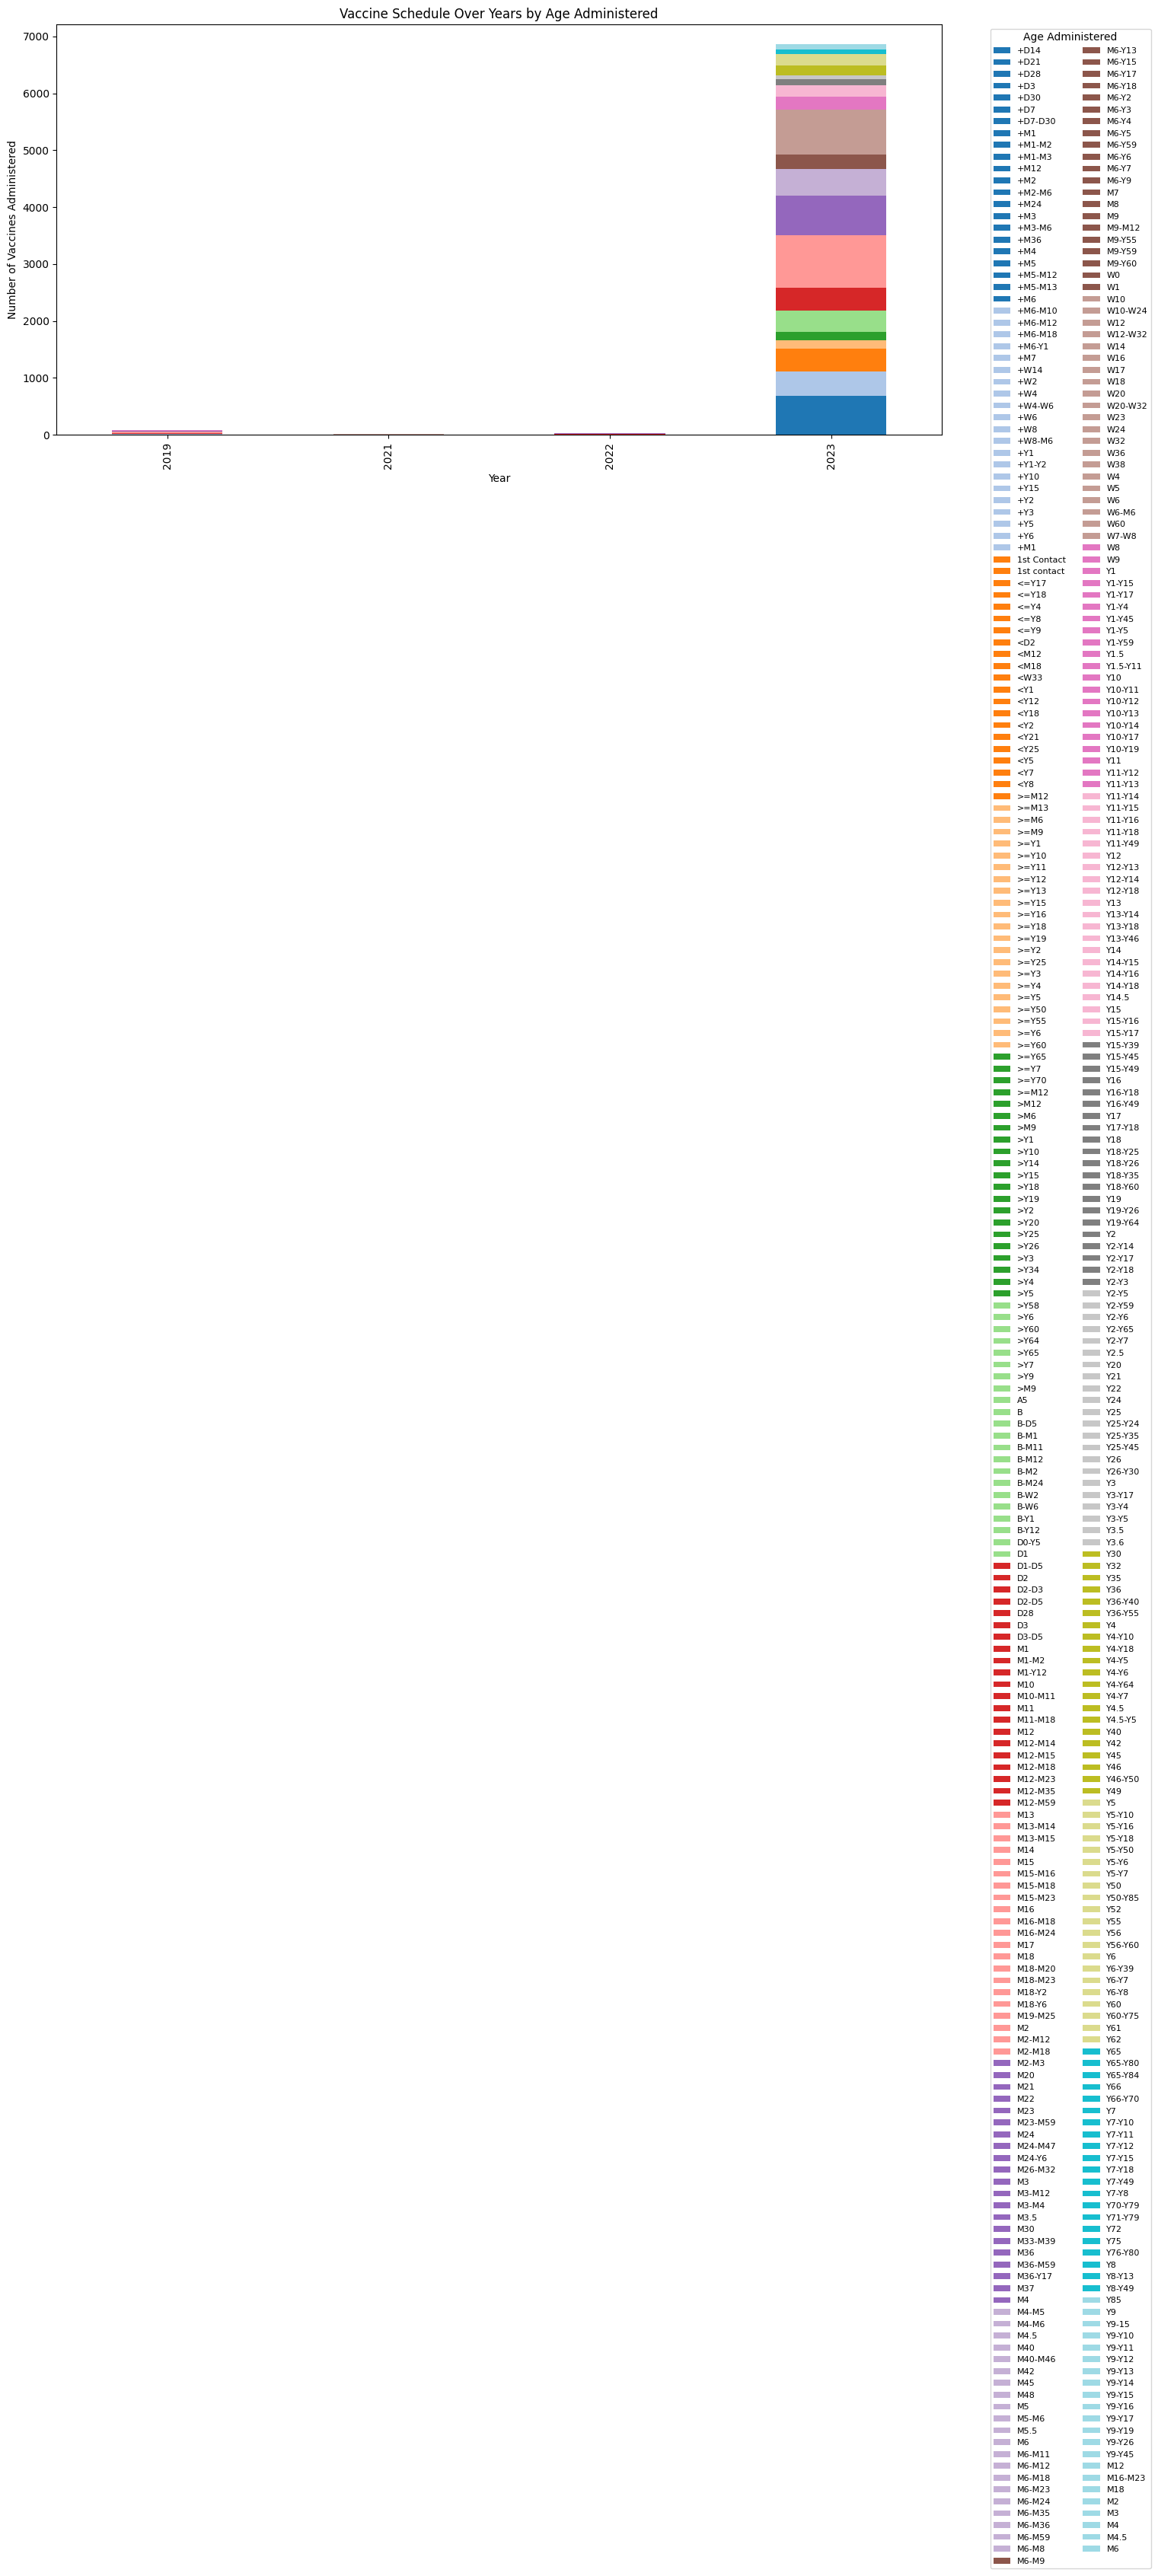

In [24]:

# Ensure YEAR is numeric
schedule['YEAR'] = pd.to_numeric(schedule['YEAR'], errors='coerce')

# Filter out rows with missing AGEADMINISTERED
schedule_clean = schedule.dropna(subset=['AGEADMINISTERED'])

# Create a pivot table: index = YEAR, columns = AGEADMINISTERED, values = count of vaccines
pivot_schedule = schedule_clean.pivot_table(
    index='YEAR',
    columns='AGEADMINISTERED',
    values='VACCINE_DESCRIPTION',
    aggfunc='count',
    fill_value=0
)
pivot_schedule.plot(
    kind='bar',
    stacked=True,
    figsize=(15,7),
    colormap='tab20'
)

plt.title("Vaccine Schedule Over Years by Age Administered")
plt.xlabel("Year")
plt.ylabel("Number of Vaccines Administered")
plt.legend(
    title='Age Administered',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    ncol=2,       # Break legend into 2 columns
    fontsize=8    # Smaller font
)
plt.tight_layout()
plt.show()



### Insights found from the chart

* **2023 records the highest number of vaccines administered**, indicating a recent surge in vaccination efforts or updated reporting.
* Previous years show comparatively lower counts, suggesting either gradual rollout or limited data capture.
* The distribution across ages reveals that most vaccines are still concentrated in **infant and early childhood age groups**, reflecting standard immunization schedules.
* The sharp increase in 2023 may highlight **accelerated public health initiatives, catch-up campaigns, or improved data collection**.
* Overall, while earlier years show moderate activity, **the trend points toward intensified vaccination coverage in recent times**.


## **Overall Analysis & Recommendations**


### Overall Analysis

The data reveals clear progress in global vaccination efforts, but also persistent disparities. On average, countries reach about **80% vaccination coverage**, though **low-income groups, least developed nations, and Gavi Phase 5 countries** remain stuck near **50%**, highlighting a major equity gap. The historical rollout of vaccines also shows sharp regional differences — **AMRO introduced seasonal influenza vaccines in 1940**, while **SEARO lagged until the 1990s**. A surge in vaccinations occurred between **1980 and 1990**, coinciding with major global health initiatives, and coverage peaked around **2010** before plateauing, suggesting that many systems have hit a ceiling.

Disease incidence patterns reinforce vaccine effectiveness: most data clusters show that **higher coverage corresponds to lower incidence**, with outliers like **measles and pertussis spiking in the 1980s**, **mumps in 2000**, and **typhoid rising more recently**. The burden is also unevenly distributed — **China and India record the highest case counts** due to population size, but **half of the top ten are African countries**, underlining gaps in healthcare infrastructure. Recent years, particularly **2023**, show an unprecedented rise in vaccine administration, especially among **infants and young children**, pointing to intensified campaigns, catch-up drives, or improved reporting systems.

### Recommendations

* **Close the equity gap** by prioritizing funding and logistics for low-income and Gavi-tracked regions.
* **Strengthen healthcare infrastructure in Africa** to address recurring high disease incidence.
* **Overcome the post-2010 plateau** by expanding outreach, tackling vaccine hesitancy, and adopting flexible immunization schedules.
* **Focus surveillance on emerging spikes** (e.g., rising typhoid incidence) to prevent new threats from escalating.
* **Tailor strategies for population giants** like China and India, ensuring vaccine supply and reporting scale with demand.
* **Leverage the 2023 surge** to lock in long-term gains, sustaining momentum for higher global vaccine uptake.


# **Conclusion**

This project began with the integration of five different datasets, which were carefully mounted and explored to understand their structure and contents. Initial steps included checking dataset information, handling missing values, and performing essential data wrangling to ensure consistency across fields like country names, years, and disease indicators. Once cleaned, the datasets were systematically combined and inserted into a SQLite database, creating a structured repository that allowed for efficient querying and analysis. This database-first approach ensured that the data could be reused flexibly across different tools without redundancy.

The analytical phase involved both exploratory data analysis (EDA) in Python and interactive visualization in Power BI. Using Python, key trends and correlations were uncovered, such as the relationship between vaccination coverage and disease incidence, historical introduction timelines of vaccines, and coverage disparities across regions and development groups. Later, the SQLite database was connected to Power BI, where dynamic dashboards were built, including geographical maps, trend charts, scatter plots, and KPI indicators. These visualizations not only validated earlier findings but also provided an interactive platform for stakeholders to explore the data in detail. Overall, the project successfully demonstrated the pipeline of data collection, cleaning, database management, and visualization, offering meaningful insights into global vaccination trends and public health challenges.

### ***Hurrah! You have successfully completed your EDA Project !!!***